## SOCIAL NETWORK ADDS ANALYSIS

## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn import metrics
import numpy as np


## Data Preprocessing and Visualization

In [2]:
dataset = pd.read_csv('Downloads/Modified_Social_Network_Ads.csv')


In [3]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          10000 non-null  int64 
 1   Gender           10000 non-null  object
 2   Age              10000 non-null  int64 
 3   EstimatedSalary  10000 non-null  int64 
 4   Purchased        10000 non-null  int64 
 5   Occupation       10000 non-null  object
 6   Education Level  10000 non-null  object
 7   Marital Status   10000 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [4]:
dataset.nunique()


User ID             400
Gender                2
Age                  43
EstimatedSalary    8949
Purchased             2
Occupation           10
Education Level       4
Marital Status        4
dtype: int64

In [5]:
dataset.drop(columns='User ID',axis=1,inplace=True)


In [6]:
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Occupation'] = label_encoder.fit_transform(dataset['Occupation'])
dataset['Education Level'] = label_encoder.fit_transform(dataset['Education Level'])
dataset['Marital Status'] = label_encoder.fit_transform(dataset['Marital Status'])

In [7]:
dataset['Age_Salary_Ratio'] = dataset['Age'] / dataset['EstimatedSalary']

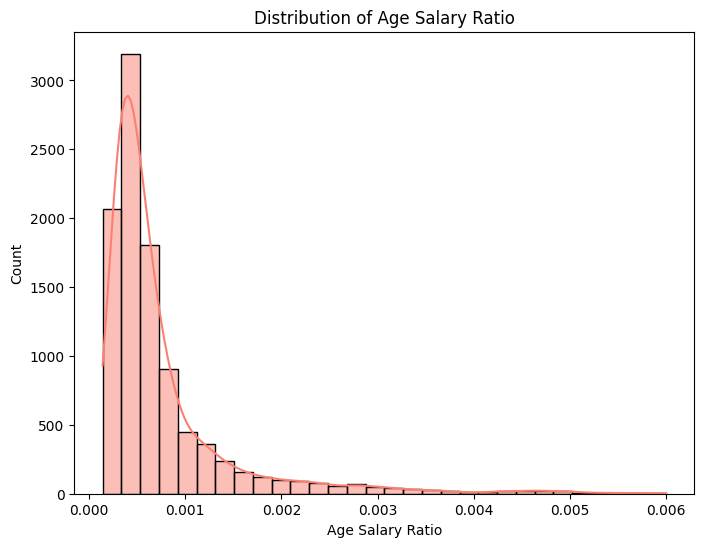

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Age_Salary_Ratio'], kde=True, color='salmon', bins=30)
plt.title('Distribution of Age Salary Ratio')
plt.xlabel('Age Salary Ratio')
plt.ylabel('Count')
plt.show()

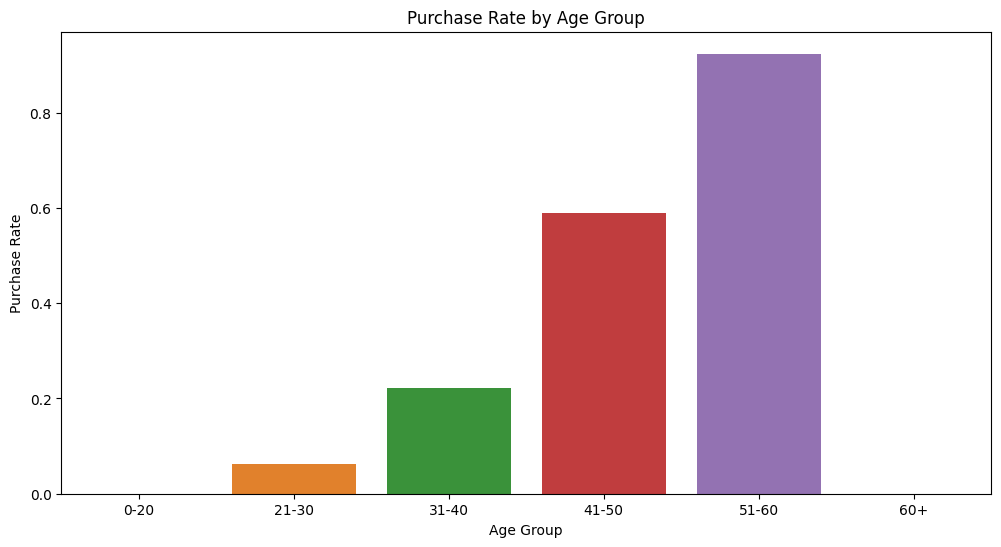

In [9]:
dataset['Age_Group'] = pd.cut(dataset['Age'], bins=[0, 20, 30, 40, 50, 60, float('inf')], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Age_Group', y='Purchased', data=dataset, errorbar=None)
plt.title('Purchase Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Purchase Rate')
plt.show()


In [10]:
dataset.isnull().sum()/len(dataset)*100


Gender              0.0
Age                 0.0
EstimatedSalary     0.0
Purchased           0.0
Occupation          0.0
Education Level     0.0
Marital Status      0.0
Age_Salary_Ratio    0.0
Age_Group           0.0
dtype: float64

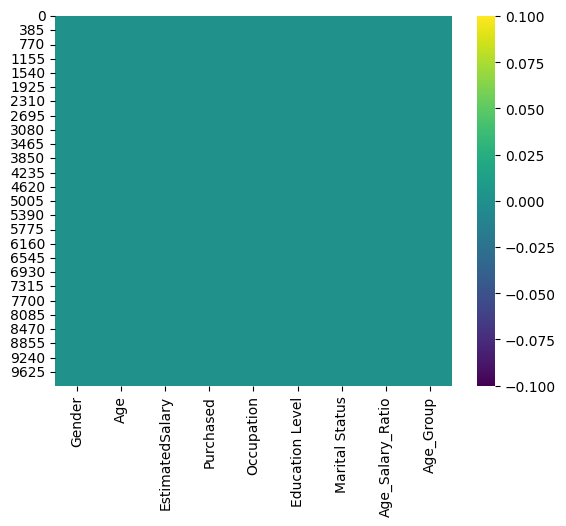

In [11]:
sns.heatmap(dataset.isnull(),cmap='viridis');


In [12]:
dataset['Purchased'].value_counts()


Purchased
0    6459
1    3541
Name: count, dtype: int64

In [13]:
dataset['Purchased'].value_counts(normalize=True)


Purchased
0    0.6459
1    0.3541
Name: proportion, dtype: float64

<Axes: xlabel='Purchased', ylabel='count'>

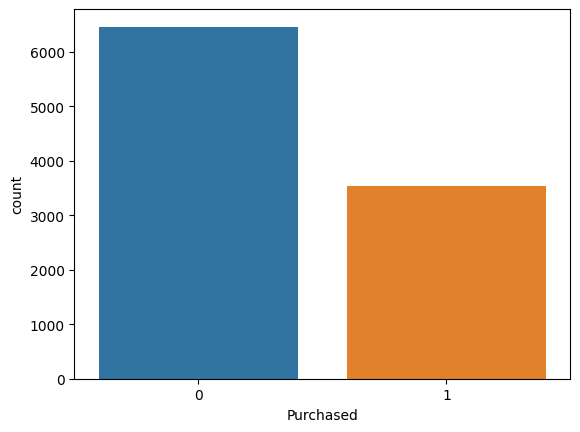

In [14]:
sns.countplot(x='Purchased',data=dataset)


In [15]:
dataset.describe()


,Gender,Age,EstimatedSalary,Purchased,Occupation,Education Level,Marital Status,Age_Salary_Ratio
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.483700,37.642800,74188.050800,0.354100,4.472700,1.512700,1.495300,0.000756
std,0.499759,10.513765,36966.220116,0.478264,2.874488,1.114793,1.109189,0.000746
min,0.000000,18.000000,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000140
25%,0.000000,30.000000,46227.500000,0.000000,2.000000,1.000000,1.000000,0.000359
50%,0.000000,37.000000,71344.500000,0.000000,4.000000,2.000000,1.000000,0.000510
75%,1.000000,45.000000,99743.250000,1.000000,7.000000,3.000000,2.000000,0.000806
max,1.000000,60.000000,150000.000000,1.000000,9.000000,3.000000,3.000000,0.006000


<Axes: xlabel='Age', ylabel='Count'>

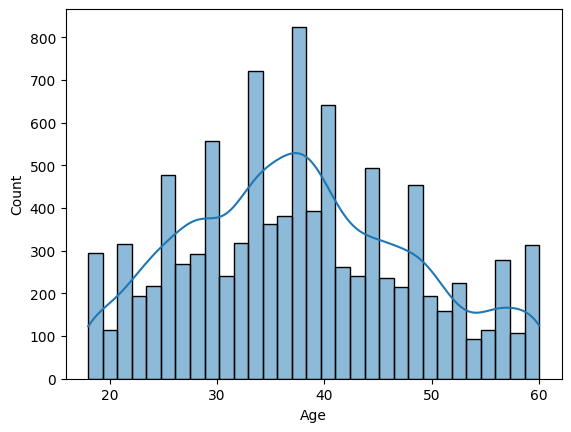

In [16]:
sns.histplot(dataset['Age'],kde=True)


<Axes: ylabel='EstimatedSalary'>

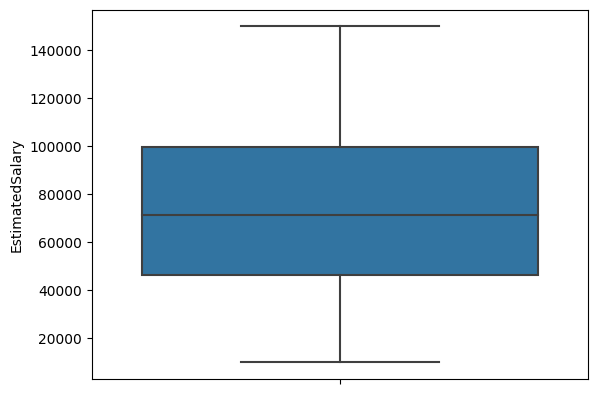

In [17]:
sns.boxplot(y=dataset['EstimatedSalary'])


<Axes: xlabel='Gender', ylabel='count'>

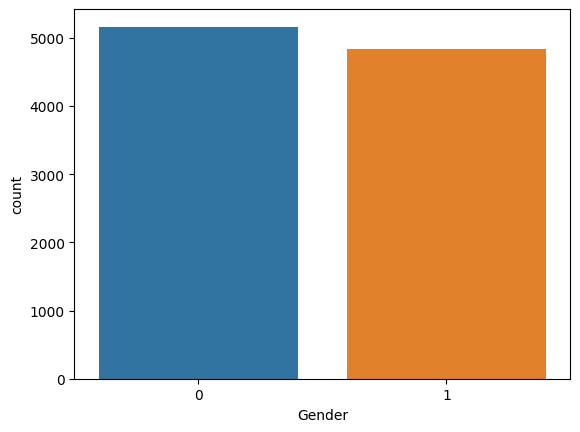

In [18]:
sns.countplot(x='Gender',data=dataset)


In [19]:
dataset.Gender.value_counts()


Gender
0    5163
1    4837
Name: count, dtype: int64

In [20]:
dataset.groupby('Gender')['Purchased'].value_counts()/len(dataset)*100


Gender  Purchased
0       0            32.68
        1            18.95
1       0            31.91
        1            16.46
Name: count, dtype: float64

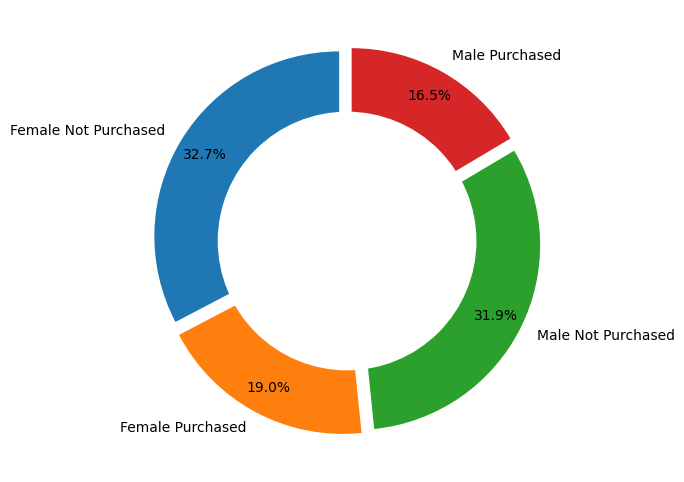

In [21]:
fig,ax = plt.subplots(figsize=(8, 6))

labels =["Female Not Purchased","Female Purchased",
           "Male Not Purchased","Male Purchased" ]

data_per = dataset.groupby('Gender')['Purchased'].value_counts()/len(dataset)*100
sizes = [round(i,2) for i in (list(data_per))]

explode = (0.05,0.05,0.05,0.05)

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)


In [22]:
dataset.groupby('Gender')['Purchased'].mean()


Gender
0    0.367035
1    0.340294
Name: Purchased, dtype: float64

<Axes: xlabel='Gender', ylabel='EstimatedSalary'>

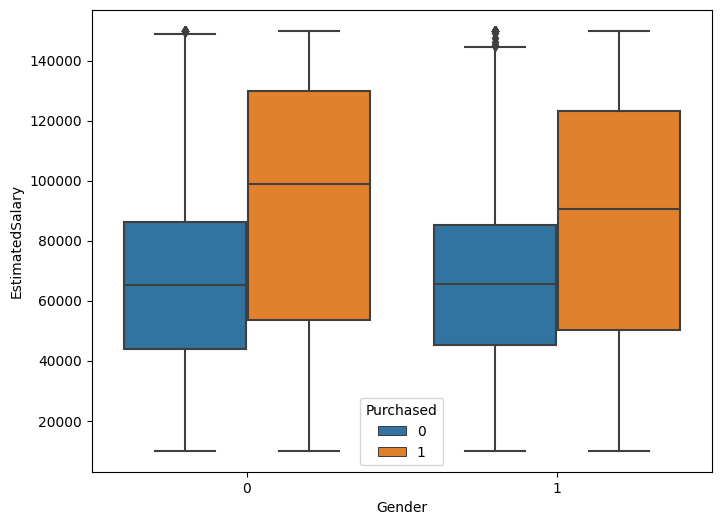

In [23]:
plt.subplots(figsize=(8, 6))
sns.boxplot(x='Gender',y='EstimatedSalary',data=dataset,hue='Purchased')


In [24]:
dataset.groupby(['Gender','Purchased'])['EstimatedSalary'].mean()


Gender  Purchased
0       0            65862.655141
        1            91914.160422
1       0            65385.275776
        1            87375.213852
Name: EstimatedSalary, dtype: float64

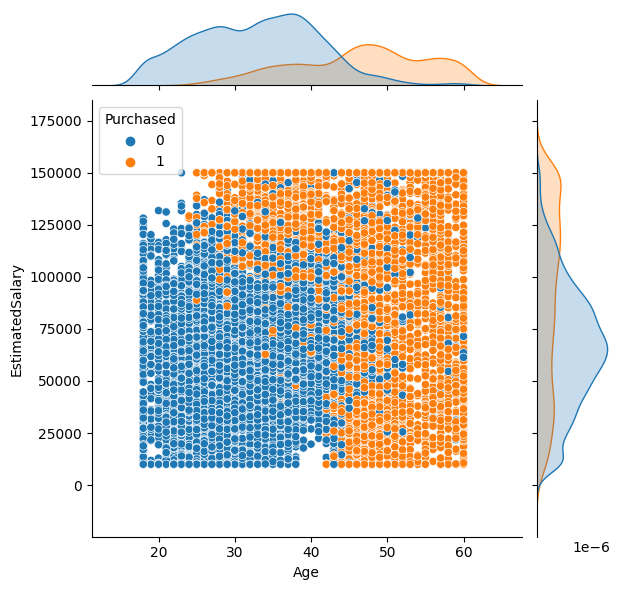

In [25]:
sns.jointplot(x='Age',y='EstimatedSalary',data=dataset,hue='Purchased')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 58.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='Age'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 76.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


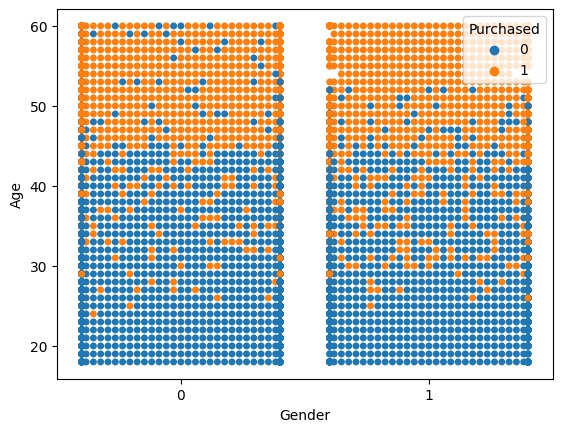

In [26]:
sns.swarmplot(x='Gender',y='Age',hue='Purchased',data=dataset)


In [27]:
dataset.groupby(['Gender','Purchased'])['Age'].mean()


Gender  Purchased
0       0            33.020196
        1            47.356728
1       0            32.651833
        1            45.312880
Name: Age, dtype: float64

In [28]:
X = dataset.iloc[:,:3]
Y = dataset.iloc[:,3]


<Axes: >

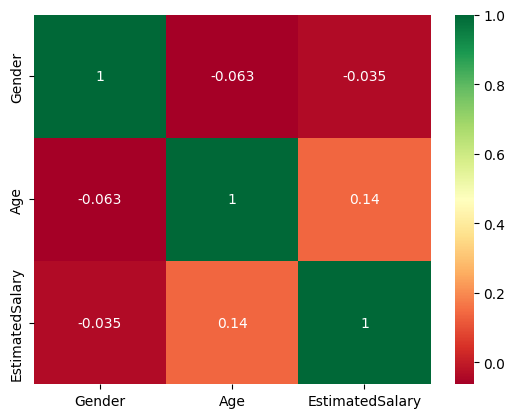

In [29]:
numerical_columns = X.select_dtypes(include=[np.number])
sns.heatmap(numerical_columns.corr(), annot=True, cmap='RdYlGn')


In [30]:
X=pd.get_dummies(columns=['Gender'],data=X,drop_first=True)


In [31]:
X.head()


,Age,EstimatedSalary,Gender_1
0,25,113734,False
1,29,71724,False
2,35,52958,True
3,27,60738,True
4,46,17501,False


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=101)


In [33]:
standard_Scaler=StandardScaler()
X_train = standard_Scaler.fit_transform(X_train)
X_test = standard_Scaler.transform(X_test)


## Hyperparameter Tuning

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Logistic Regression
param_dist_logreg = {'C': uniform(0.1, 100), 'penalty': ['l2']}
random_logreg = RandomizedSearchCV(LogisticRegression(random_state=2), param_distributions=param_dist_logreg, n_iter=10, refit=True, verbose=3, scoring='roc_auc')
random_logreg.fit(X_train, y_train)
best_params_logreg = random_logreg.best_params_

# Decision Tree
param_dist_dt = {'max_depth': randint(3, 10)}
random_dt = RandomizedSearchCV(DecisionTreeClassifier(random_state=2), param_distributions=param_dist_dt, n_iter=10, refit=True, verbose=3, scoring='roc_auc')
random_dt.fit(X_train, y_train)
best_params_dt = random_dt.best_params_

# K-Nearest Neighbors
param_dist_knn = {'n_neighbors': randint(1, 30)}
random_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=10, refit=True, verbose=3, scoring='roc_auc')
random_knn.fit(X_train, y_train)
best_params_knn = random_knn.best_params_

# Random Forest
param_dist_rf = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=2), param_distributions=param_dist_rf, n_iter=10, refit=True, verbose=3, scoring='roc_auc')
random_rf.fit(X_train, y_train)
best_params_rf = random_rf.best_params_




from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import randint

# Define the parameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': randint(50, 300),
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a Gradient Boosting Classifier
gradient_boost = GradientBoostingClassifier(random_state=2)

# Create RandomizedSearchCV object
random_gb = RandomizedSearchCV(gradient_boost, param_distributions=param_dist_gb, n_iter=10, refit=True, verbose=3, scoring='roc_auc')

# Fit the model to the training data
random_gb.fit(X_train, y_train)

# Get the best parameters
best_params_gb = random_gb.best_params_




# Support Vector Machine
param_dist_svc = {
    'C': uniform(0.1, 10),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}
random_svc = RandomizedSearchCV(SVC(random_state=2, probability=True), param_distributions=param_dist_svc, n_iter=10, refit=True, verbose=3, scoring='roc_auc')
random_svc.fit(X_train, y_train)
best_params_svc = random_svc.best_params_


from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Assuming X_train and y_train are your training data
# Create and fit the Gaussian Naive Bayes model
nb_model=GaussianNB()

# Define parameter distributions for Randomized Search
param_dist_nb = {
    'var_smoothing': uniform(1e-9, 1e-7)
}

# Randomized Search for Naive Bayes
random_nb = RandomizedSearchCV(nb_model, param_distributions=param_dist_nb, n_iter=10, refit=True, verbose=3, scoring='roc_auc')
random_nb.fit(X_train, y_train)
best_params_nb = random_nb.best_params_



from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score

# Custom scorer for silhouette score
def silhouette_scorer(estimator, X):
    clusters = estimator.fit_predict(X)
    score = silhouette_score(X, clusters)
    return score

# Generate some sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Agglomerative Clustering
ac_model = AgglomerativeClustering()

# Updated parameter distributions
param_dist_ac = {
    'n_clusters': randint(2, 10),
    'linkage': ['complete', 'average', 'single'],  # Exclude 'ward' for non-Euclidean distances
    'metric': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
}
# Randomized Search for Agglomerative Clustering
random_ac = RandomizedSearchCV(ac_model, param_distributions=param_dist_ac, n_iter=10, scoring=make_scorer(silhouette_scorer), random_state=42)
random_ac.fit(X)

# Access best hyperparameters
best_params_ac = random_ac.best_params_



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..C=10.434282958995421, penalty=l2;, score=0.913 total time=   0.0s
[CV 2/5] END ..C=10.434282958995421, penalty=l2;, score=0.908 total time=   0.0s
[CV 3/5] END ..C=10.434282958995421, penalty=l2;, score=0.911 total time=   0.0s
[CV 4/5] END ..C=10.434282958995421, penalty=l2;, score=0.900 total time=   0.0s
[CV 5/5] END ..C=10.434282958995421, penalty=l2;, score=0.906 total time=   0.0s
[CV 1/5] END ...C=7.670793991947733, penalty=l2;, score=0.913 total time=   0.0s
[CV 2/5] END ...C=7.670793991947733, penalty=l2;, score=0.908 total time=   0.0s
[CV 3/5] END ...C=7.670793991947733, penalty=l2;, score=0.911 total time=   0.0s
[CV 4/5] END ...C=7.670793991947733, penalty=l2;, score=0.900 total time=   0.0s
[CV 5/5] END ...C=7.670793991947733, penalty=l2;, score=0.906 total time=   0.0s
[CV 1/5] END ...C=65.44876162590265, penalty=l2;, score=0.913 total time=   0.0s
[CV 2/5] END ...C=65.44876162590265, penalty=l2;

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 811, in _score
    scores = scorer(estimator, X_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_val

In [35]:
best_params_logreg,best_params_dt,best_params_knn,best_params_rf,best_params_gb,best_params_svc,best_params_nb,best_params_ac

({'C': 10.434282958995421, 'penalty': 'l2'},
 {'max_depth': 6},
 {'n_neighbors': 29},
 {'max_depth': 20,
  'min_samples_leaf': 4,
  'min_samples_split': 10,
  'n_estimators': 264},
 {'learning_rate': 0.01,
  'max_depth': 7,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 144,
  'subsample': 1.0},
 {'C': 8.33787745804335, 'gamma': 'scale', 'kernel': 'rbf'},
 {'var_smoothing': 3.415092560428367e-09},
 {'linkage': 'single', 'metric': 'manhattan', 'n_clusters': 6})

In [36]:
print(best_params_logreg.keys())

dict_keys(['C', 'penalty'])


## Logistic Regression

## Training Data

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
score=[]
# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=1,C=best_params_logreg['C'],penalty=best_params_logreg['penalty'])

# Train the model
logreg_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_logreg_model = CalibratedClassifierCV(logreg_model, method='sigmoid', cv=5)
calibrated_logreg_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_logreg_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("Logistic Regression Model Performance (Train Dataset):")
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Logistic Regression Model Performance (Train Dataset):
------------------------------------
Precision: 0.79, Recall: 0.69, Accuracy: 0.82, Mean_squared_Error:0.18, Loss:0.37,Absolute Error:0.18,RMSE:0.42,R2:0.23,Adjusted R2:0.23,explained variance score:0.24,Mean Squared Logarithmic Error:0.08,Root Mean Squared Logarthmic Error:0.29


## Confusion Matrix

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4365  495]
 [ 822 1818]]


## Classification Report

In [39]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4860
           1       0.79      0.69      0.73      2640

    accuracy                           0.82      7500
   macro avg       0.81      0.79      0.80      7500
weighted avg       0.82      0.82      0.82      7500



## Testing Data

In [40]:
print("Logistic Regression Model Performance (Test Dataset):")

# Assuming logreg_model is your Logistic Regression model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_logreg_model = CalibratedClassifierCV(logreg_model, method='sigmoid', cv=5)
calibrated_logreg_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_logreg_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Logistic Regression Model Performance (Test Dataset):
------------------------------------

Precision: 0.80, Recall: 0.68, Accuracy: 0.83, Mean_squared_Error:0.17, Loss:0.37,Absolute Error:0.17,RMSE:0.42,R2:0.25,Adjusted R2:0.24,explained variance score:0.26,Mean Squared Logarithmic Error:0.08,Root Mean Squared Logarthmic Error:0.29


## Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1448  151]
 [ 284  617]]


## Classification Report

In [42]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1599
           1       0.80      0.68      0.74       901

    accuracy                           0.83      2500
   macro avg       0.82      0.80      0.80      2500
weighted avg       0.82      0.83      0.82      2500



## Decision Tree

## Training Data

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1,max_depth=best_params_dt['max_depth'])

# Train the model
dt_model.fit(X_train, y_train)

print("Decision Tree Model Performance (Train Dataset):")

# Calibrate the classifier for better probability estimates
calibrated_dt_model = CalibratedClassifierCV(dt_model, method='sigmoid', cv=5)
calibrated_dt_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_dt_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Decision Tree Model Performance (Train Dataset):
------------------------------------
Precision: 0.85, Recall: 0.82, Accuracy: 0.88, Mean_squared_Error:0.12, Loss:0.28,Absolute Error:0.12,RMSE:0.34,R2:0.49,Adjusted R2:0.49,explained variance score:0.50,Mean Squared Logarithmic Error:0.06,Root Mean Squared Logarthmic Error:0.24


## Confusion Matrix

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4479  381]
 [ 484 2156]]


## Classification Report

In [45]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4860
           1       0.85      0.82      0.83      2640

    accuracy                           0.88      7500
   macro avg       0.88      0.87      0.87      7500
weighted avg       0.88      0.88      0.88      7500



## Testing Data

In [46]:
print("Decision Tree Model Performance (Test Dataset):")

# Assuming dt_model is your Decision Tree model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_dt_model = CalibratedClassifierCV(dt_model, method='sigmoid', cv=5)
calibrated_dt_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_dt_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Decision Tree Model Performance (Test Dataset):
------------------------------------

Precision: 0.85, Recall: 0.80, Accuracy: 0.88, Mean_squared_Error:0.12, Loss:0.31,Absolute Error:0.12,RMSE:0.35,R2:0.46,Adjusted R2:0.46,explained variance score:0.46,Mean Squared Logarithmic Error:0.06,Root Mean Squared Logarthmic Error:0.24


## Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1468  131]
 [ 180  721]]


## Classification Report

In [48]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1599
           1       0.85      0.80      0.82       901

    accuracy                           0.88      2500
   macro avg       0.87      0.86      0.86      2500
weighted avg       0.87      0.88      0.87      2500



## KNN

In [49]:
error = []

for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


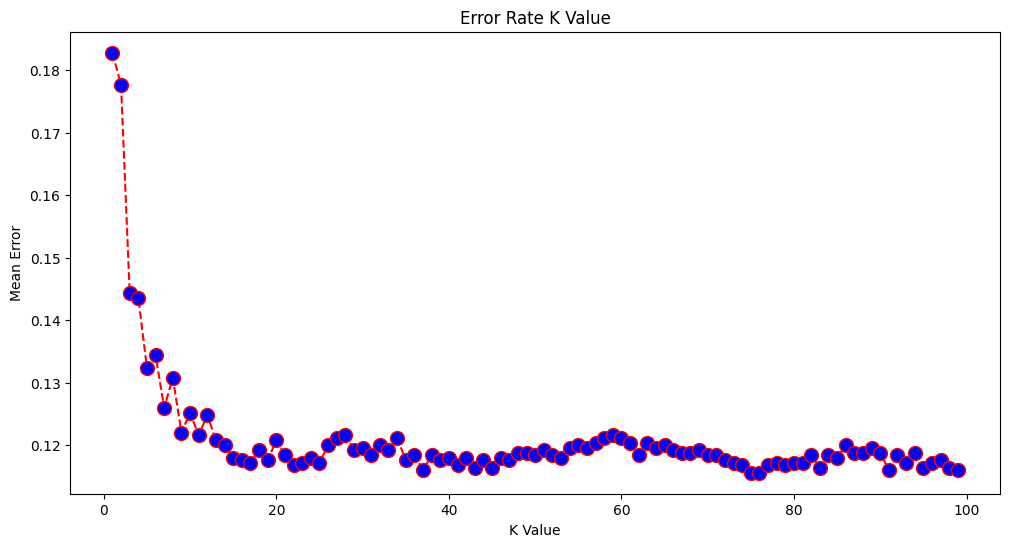

In [50]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()


## Training Data

In [51]:
from sklearn.neighbors import KNeighborsClassifier

print("K-Nearest Neighbours Model Performance (Train Dataset):")

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a K-Nearest Neighbors model
classifier = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])

# Train the model
classifier.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_knn_model = CalibratedClassifierCV(classifier, method='sigmoid', cv=5)
calibrated_knn_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_knn_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


K-Nearest Neighbours Model Performance (Train Dataset):
------------------------------------
Precision: 0.84, Recall: 0.82, Accuracy: 0.88, Mean_squared_Error:0.12, Loss:0.29,Absolute Error:0.12,RMSE:0.34,R2:0.48,Adjusted R2:0.48,explained variance score:0.48,Mean Squared Logarithmic Error:0.06,Root Mean Squared Logarthmic Error:0.24


## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4452  408]
 [ 478 2162]]


## Classification Report

In [53]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4860
           1       0.84      0.82      0.83      2640

    accuracy                           0.88      7500
   macro avg       0.87      0.87      0.87      7500
weighted avg       0.88      0.88      0.88      7500



## Testing Data

In [54]:
print("K-Nearest Neighbours Model Performance (Test Dataset):")

# Assuming knn_model is your K-Nearest Neighbors model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_knn_model = CalibratedClassifierCV(classifier, method='sigmoid', cv=5)
calibrated_knn_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_knn_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


K-Nearest Neighbours Model Performance (Test Dataset):
------------------------------------

Precision: 0.84, Recall: 0.82, Accuracy: 0.88, Mean_squared_Error:0.12, Loss:0.30,Absolute Error:0.12,RMSE:0.35,R2:0.48,Adjusted R2:0.48,explained variance score:0.48,Mean Squared Logarithmic Error:0.06,Root Mean Squared Logarthmic Error:0.24


## Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1462  137]
 [ 162  739]]


## Classification Report

In [56]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1599
           1       0.84      0.82      0.83       901

    accuracy                           0.88      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.88      0.88      0.88      2500



## Random Forest

## Training Data

In [57]:
# Assuming X_train, X_test, y_train, y_test are your training and testing data
print("Random Forest Model Performance (Train Dataset):")

rf_model = RandomForestClassifier(
    random_state=1,
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators']
)

rf_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_model = CalibratedClassifierCV(rf_model, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_model.predict_proba(X_train)[:, 1]

accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print(f'Best Parameters: {best_params_rf}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Log Loss: {loss:.2f}')
print(f'Mean Squared Error: {error:.2f}')
print(f'Absolute Error: {abs_error:.2f}')
print(f'R2: {r2error:.2f}')
print(f'Adjusted R2: {adjusted_r2:.2f}')
print(f'Explained Variance Score: {expl_var:.2f}')
print(f'Root Mean Squared Error: {rmse_error:.2f}')
print(f'Mean Squared Logarithmic Error: {msle:.2f}')
print(f'Root Mean Squared Logarithmic Error: {rmsle:.2f}')


Random Forest Model Performance (Train Dataset):
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 264}
Accuracy: 0.91
Precision: 0.87
Recall: 0.86
Log Loss: 0.23
Mean Squared Error: 0.09
Absolute Error: 0.09
R2: 0.58
Adjusted R2: 0.58
Explained Variance Score: 0.59
Root Mean Squared Error: 0.31
Mean Squared Logarithmic Error: 0.05
Root Mean Squared Logarithmic Error: 0.21


## Confusion Matrix

In [58]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4530  330]
 [ 380 2260]]


## Classification Report

In [59]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4860
           1       0.87      0.86      0.86      2640

    accuracy                           0.91      7500
   macro avg       0.90      0.89      0.90      7500
weighted avg       0.90      0.91      0.91      7500



## Testing Data

In [60]:
print("Random Forest Model Performance (Test Dataset):")

# Assuming best_model_rf is the calibrated model obtained previously
# If not, you may need to calibrate the best_model_rf as shown in the previous examples

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_model.predict_proba(X_test)[:, 1]

accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Random Forest Model Performance (Test Dataset):
------------------------------------

Precision: 0.85, Recall: 0.82, Accuracy: 0.88, Mean_squared_Error:0.12, Loss:0.31,Absolute Error:0.12,RMSE:0.34,R2:0.49,Adjusted R2:0.49,explained variance score:0.49,Mean Squared Logarithmic Error:0.06,Root Mean Squared Logarthmic Error:0.24


## Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1463  136]
 [ 159  742]]


## Classification Report

In [62]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1599
           1       0.85      0.82      0.83       901

    accuracy                           0.88      2500
   macro avg       0.87      0.87      0.87      2500
weighted avg       0.88      0.88      0.88      2500



## SVC

## Training Data

In [63]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Assuming X_train, X_test, y_train, y_test are your training and testing data
print("SVC Model Performance (Train Dataset):")
# Create a Support Vector Classifier (SVC) model
svc_model = SVC(probability=True, C=best_params_svc['C'],gamma=best_params_svc['gamma'],kernel=best_params_svc['kernel'])

# Train the model
svc_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_svc_model = CalibratedClassifierCV(svc_model, method='sigmoid', cv=5)
calibrated_svc_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_svc_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


SVC Model Performance (Train Dataset):
------------------------------------
Precision: 0.84, Recall: 0.81, Accuracy: 0.88, Mean_squared_Error:0.12, Loss:0.30,Absolute Error:0.12,RMSE:0.35,R2:0.47,Adjusted R2:0.47,explained variance score:0.47,Mean Squared Logarithmic Error:0.06,Root Mean Squared Logarthmic Error:0.24


## Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4468  392]
 [ 509 2131]]


## Classification Report

In [65]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4860
           1       0.84      0.81      0.83      2640

    accuracy                           0.88      7500
   macro avg       0.87      0.86      0.87      7500
weighted avg       0.88      0.88      0.88      7500



## Testing Data

In [66]:
print("SVC Model Performance (Test Dataset):")

# Assuming svc_model is your Support Vector Classifier (SVC) model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_svc_model = CalibratedClassifierCV(svc_model, method='sigmoid', cv=5)
calibrated_svc_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_svc_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


SVC Model Performance (Test Dataset):
------------------------------------

Precision: 0.85, Recall: 0.81, Accuracy: 0.88, Mean_squared_Error:0.12, Loss:0.30,Absolute Error:0.12,RMSE:0.35,R2:0.47,Adjusted R2:0.47,explained variance score:0.47,Mean Squared Logarithmic Error:0.06,Root Mean Squared Logarthmic Error:0.24


## Confusion Matrix

In [67]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1470  129]
 [ 175  726]]


## Classification Report

In [68]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1599
           1       0.85      0.81      0.83       901

    accuracy                           0.88      2500
   macro avg       0.87      0.86      0.87      2500
weighted avg       0.88      0.88      0.88      2500



## Naive Bayes

## Training Data

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn import metrics
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Naive Bayes model
nb_model = GaussianNB(var_smoothing=best_params_nb['var_smoothing'])

# Train the model
nb_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_nb_model = CalibratedClassifierCV(nb_model, method='sigmoid', cv=5)
calibrated_nb_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_nb_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int), zero_division=1)
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("Naive Bayes Model Performance (Train Dataset):")
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarithmic Error:{rmsle:.2f}')


Naive Bayes Model Performance (Train Dataset):
------------------------------------
Precision: 0.83, Recall: 0.76, Accuracy: 0.86, Mean_squared_Error:0.14, Loss:0.34,Absolute Error:0.14,RMSE:0.37,R2:0.39,Adjusted R2:0.39,explained variance score:0.40,Mean Squared Logarithmic Error:0.07,Root Mean Squared Logarithmic Error:0.26


## Confusion Matrix

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4452  408]
 [ 630 2010]]


## Classification Report

In [71]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      4860
           1       0.83      0.76      0.79      2640

    accuracy                           0.86      7500
   macro avg       0.85      0.84      0.85      7500
weighted avg       0.86      0.86      0.86      7500



## Testing Data

In [72]:
print("Naive Bayes Model Performance (Test Dataset):")

# Assuming nb_model is your Naive Bayes model
# If not, you may need to create and train the model as shown in the previous Naive Bayes example

# Calibrate the classifier for better probability estimates
calibrated_nb_model = CalibratedClassifierCV(nb_model, method='sigmoid', cv=5)
calibrated_nb_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_nb_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int), zero_division=1)
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarithmic Error:{rmsle:.2f}')


Naive Bayes Model Performance (Test Dataset):
------------------------------------

Precision: 0.83, Recall: 0.75, Accuracy: 0.86, Mean_squared_Error:0.14, Loss:0.34,Absolute Error:0.14,RMSE:0.37,R2:0.40,Adjusted R2:0.40,explained variance score:0.41,Mean Squared Logarithmic Error:0.07,Root Mean Squared Logarithmic Error:0.26


## Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1478  121]
 [ 224  677]]


## Classification Report

In [74]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      1599
           1       0.85      0.75      0.80       901

    accuracy                           0.86      2500
   macro avg       0.86      0.84      0.85      2500
weighted avg       0.86      0.86      0.86      2500



## Stacking

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone

# Load the dataset
#dataset = pd.read_csv('Downloads/social_network_analysis_new.csv')

# Encode the 'Gender' column using LabelEncoder
#label_encoder = LabelEncoder()
#dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Separate features and target variable
#XX = dataset.drop(['Purchased'], axis=1)
#YY = dataset['Purchased']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.25, random_state=101)

# Standardize the features using StandardScaler
#standard_scaler = StandardScaler()
#X_train = standard_scaler.fit_transform(X_train)
#X_test = standard_scaler.transform(X_test)

# Define base models
'''rf_model = RandomForestClassifier(
    random_state=1,
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators']
)'''
gb_model = GradientBoostingClassifier(
    random_state=1,
    max_depth=best_params_gb['max_depth'],
    min_samples_leaf=best_params_gb['min_samples_leaf'],
    min_samples_split=best_params_gb['min_samples_split'],
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    subsample=best_params_gb['subsample']
)



# Train base models
#rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)





# Make predictions using base models for the test set
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Create a new DataFrame with predictions from base models
base_model_predictions = pd.DataFrame({'RF': rf_preds, 'GB': gb_preds})

# Define a meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression(random_state=1,C=best_params_logreg['C'],penalty=best_params_logreg['penalty'])

# Train the meta-model using predictions from base models
meta_model.fit(base_model_predictions, y_test)

# Now, you can use the stacked model for predictions
rf_test_preds = rf_model.predict(X_test)
gb_test_preds = gb_model.predict(X_test)
stacked_preds = meta_model.predict(pd.DataFrame({'RF': rf_test_preds, 'GB': gb_test_preds}))

# Evaluate the performance of the stacked model
accuracy_stacked = accuracy_score(y_test, stacked_preds)
print(f'Stacked Model Accuracy: {accuracy_stacked}')

# Optionally, you can use cross-validation to evaluate the overall performance
meta_model_cv = clone(meta_model)
meta_model_cv.fit(base_model_predictions, y_test)

cv_preds = cross_val_predict(meta_model_cv, base_model_predictions, y_test, cv=5)
accuracy_cv = accuracy_score(y_test, cv_preds)
print(f'Stacked Model Cross-Validated Accuracy: {accuracy_cv}')


Stacked Model Accuracy: 0.876
Stacked Model Cross-Validated Accuracy: 0.876


## Learning Curve

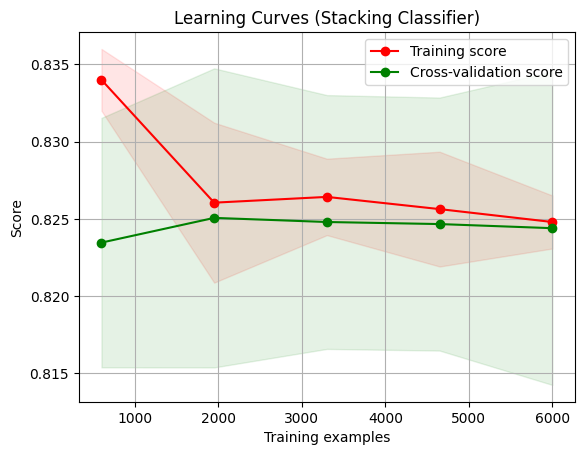

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    plt.legend(loc="best")
    return plt


# Plot learning curve for the stacking model
title = "Learning Curves (Stacking Classifier)"
plot_learning_curve(meta_model, title, X_train, y_train, cv=5)
plt.show()

## Clustering

      Gender  Age  EstimatedSalary  Occupation  Education Level  \
0          0   25           113734           7                0   
1          0   29            71724           4                0   
2          1   35            52958           0                0   
3          1   27            60738           0                3   
4          0   46            17501           2                0   
...      ...  ...              ...         ...              ...   
9995       1   37            65589           8                3   
9996       0   23            87154           1                3   
9997       1   26            91918           4                3   
9998       1   27            75823           1                1   
9999       1   34            90144           4                3   

      Marital Status  Age_Salary_Ratio  
0                  1          0.000220  
1                  2          0.000404  
2                  3          0.000661  
3                  0          0

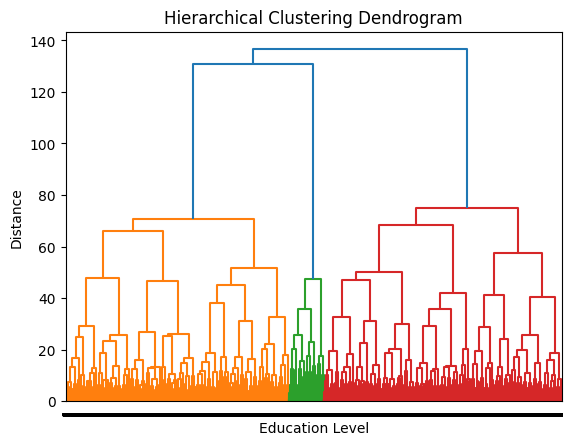

      Education Level  Cluster
0                   0        0
1                   0        0
2                   0        2
3                   3        2
4                   0        0
...               ...      ...
9995                3        2
9996                3        0
9997                3        2
9998                1        2
9999                3        2

[10000 rows x 2 columns]


In [77]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
#dataset = pd.read_csv('Downloads/Social_Network_Ads.csv')

# Encode the 'Gender' column
#label_encoder = LabelEncoder()
#dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Select features for clustering
X = dataset.drop(['Purchased','Age_Group'], axis=1)
print(X)

# Standardize the data
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')


# Plot the dendrogram
dendrogram(linkage_matrix, orientation='top', labels=dataset['Education Level'].tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Education Level')
plt.ylabel('Distance')
plt.show()

# Use Agglomerative Clustering for a specific number of clusters (you can adjust n_clusters)
#n_clusters = 3
model = AgglomerativeClustering(n_clusters=best_params_ac['n_clusters'], metric=best_params_ac['metric'], linkage=best_params_ac['linkage'])
dataset['Cluster'] = model.fit_predict(X_scaled)

# Display the resulting clusters
print(dataset[['Education Level', 'Cluster']])


## ROC Curve

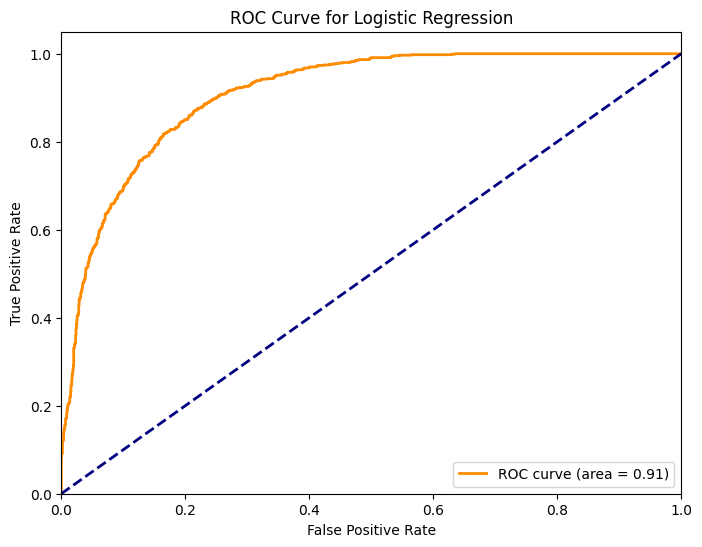

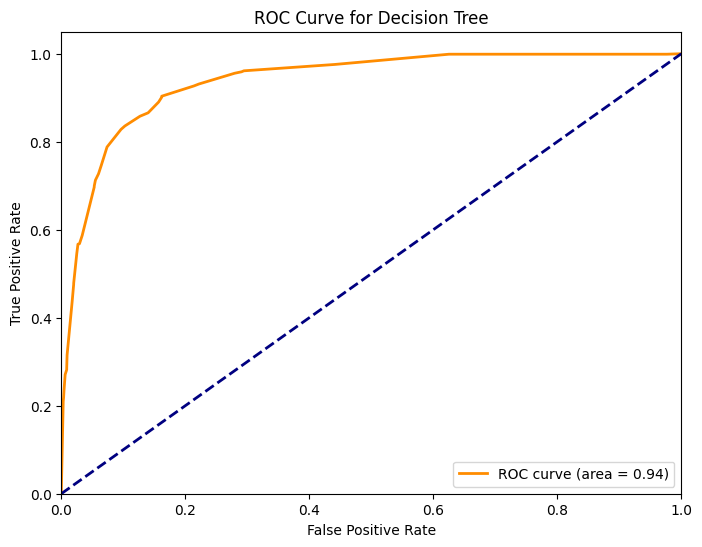

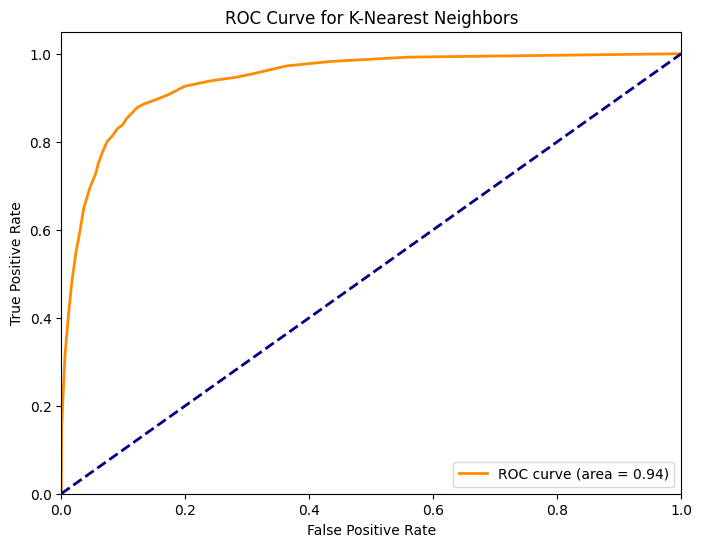

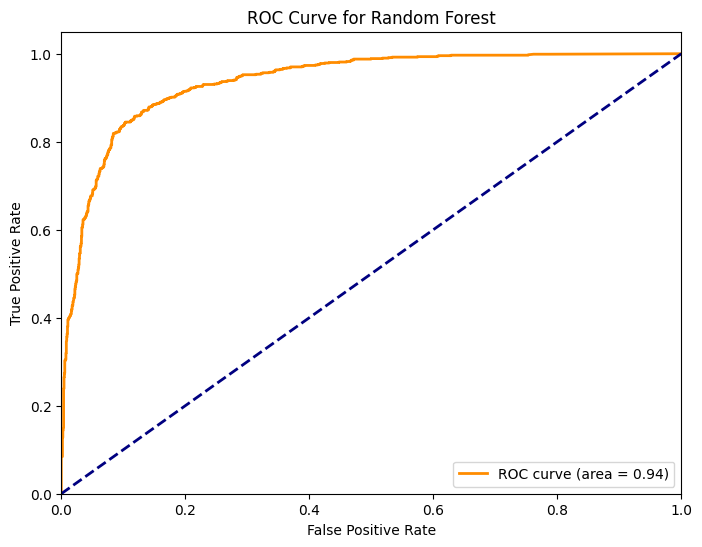

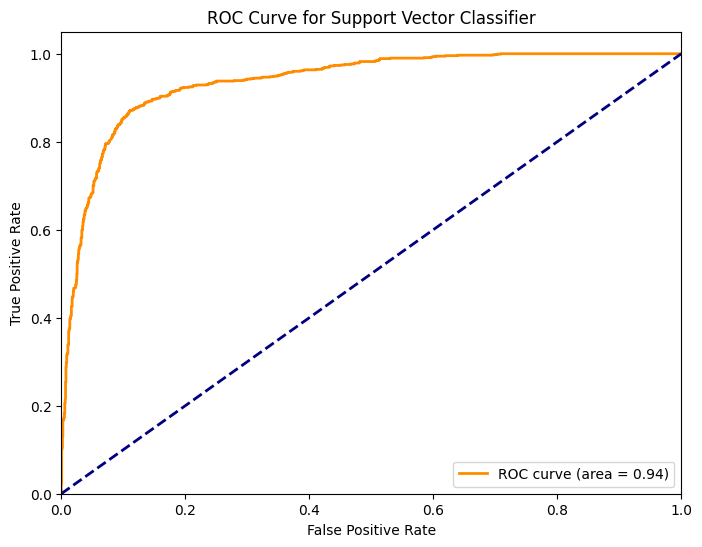

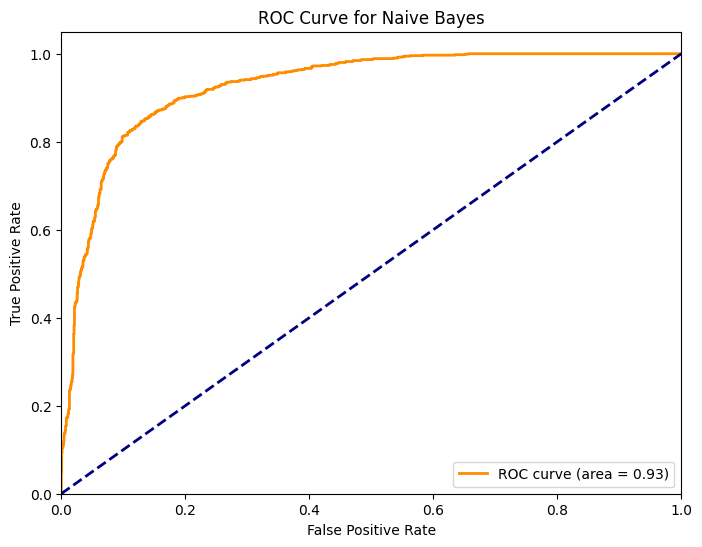

In [78]:

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
roc_auc_log = auc(fpr_log, tpr_log)
plot_roc_curve(fpr_log, tpr_log, roc_auc_log, 'Logistic Regression')

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, roc_auc_dt, 'Decision Tree')

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plot_roc_curve(fpr_knn, tpr_knn, roc_auc_knn, 'K-Nearest Neighbors')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'Random Forest')

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
roc_auc_svc = auc(fpr_svc, tpr_svc)
plot_roc_curve(fpr_svc, tpr_svc, roc_auc_svc, 'Support Vector Classifier')

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
plot_roc_curve(fpr_nb, tpr_nb, roc_auc_nb, 'Naive Bayes')


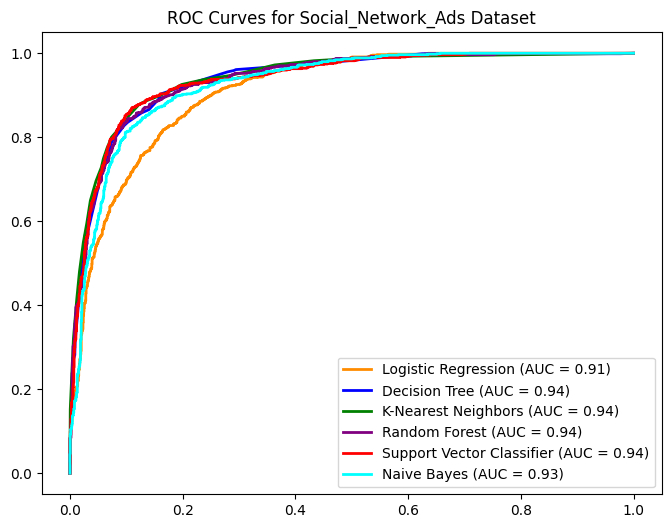

In [79]:
fig, ax = plt.subplots(figsize=(8, 6))

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
roc_auc_log = auc(fpr_log, tpr_log)
ax.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
ax.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
ax.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
roc_auc_svc = auc(fpr_svc, tpr_svc)
ax.plot(fpr_svc, tpr_svc, color='red', lw=2, label=f'Support Vector Classifier (AUC = {roc_auc_svc:.2f})')

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
ax.plot(fpr_nb, tpr_nb, color='cyan', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

plt.legend(loc='lower right')
plt.title('ROC Curves for Social_Network_Ads Dataset')
plt.show()


## Error Radar Chart

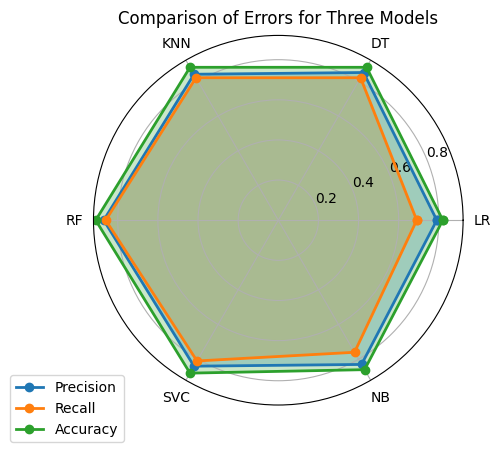

In [80]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of categories and the angles at which they are placed on the radar chart
categories = ['LR', 'DT', 'KNN', 'RF', 'SVC','NB']
N = len(categories)

# Define the data for the three machine learning models

model1_errors = [0.79,0.85,0.84,0.87,0.84,0.83]
model2_errors = [0.69,0.82,0.82,0.86,0.81,0.76]
model3_errors = [0.82,0.88,0.88,0.91,0.88,0.86]

# Create an array with the angles for each category
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # repeat the first angle to close the circular graph

# Plot the radar chart
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, model1_errors + model1_errors[:1], 'o-', linewidth=2, label='Precision')
ax.fill(angles, model1_errors + model1_errors[:1], alpha=0.25)
ax.plot(angles, model2_errors + model2_errors[:1], 'o-', linewidth=2, label='Recall')
ax.fill(angles, model2_errors + model2_errors[:1], alpha=0.25)
ax.plot(angles, model3_errors + model3_errors[:1], 'o-', linewidth=2, label='Accuracy')
ax.fill(angles, model3_errors + model3_errors[:1], alpha=0.25)

# Add labels, title, and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Comparison of Errors for Three Models', va='bottom')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


## PCA

In [81]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
#dataset = pd.read_csv('Downloads/social_network_analysis_new.csv')

# Assume X and Y are defined as follows:
# X = dataset.drop('Purchased', axis=1)  # Features
# Y = dataset['Purchased']  # Target variable

# Encode 'Gender' using LabelEncoder
#label_encoder = LabelEncoder()
#dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Standardize the features
standard_scaler = StandardScaler()
X_train_scaled = standard_scaler.fit_transform(X_train)
X_test_scaled = standard_scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=2)  # Specify the number of components you want
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

# You can now use X_train_pca and X_test_pca in your machine learning model


## Evaluating models perfomance after performing PCA

## Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
score=[]
# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=1,C=best_params_logreg['C'],penalty=best_params_logreg['penalty'])

# Train the model
logreg_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_logreg_model = CalibratedClassifierCV(logreg_model, method='sigmoid', cv=5)
calibrated_logreg_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_logreg_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("Logistic Regression Model Performance (Train Dataset):")
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Logistic Regression Model Performance (Train Dataset):
------------------------------------
Precision: 0.71, Recall: 0.60, Accuracy: 0.77, Mean_squared_Error:0.23, Loss:0.46,Absolute Error:0.23,RMSE:0.48,R2:0.01,Adjusted R2:0.01,explained variance score:0.02,Mean Squared Logarithmic Error:0.11,Root Mean Squared Logarthmic Error:0.33


## Confusion Matrix

In [83]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4230  630]
 [1069 1571]]


## Classification Report

In [84]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      4860
           1       0.71      0.60      0.65      2640

    accuracy                           0.77      7500
   macro avg       0.76      0.73      0.74      7500
weighted avg       0.77      0.77      0.77      7500



In [85]:
print("Logistic Regression Model Performance (Test Dataset):")

# Assuming logreg_model is your Logistic Regression model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_logreg_model = CalibratedClassifierCV(logreg_model, method='sigmoid', cv=5)
calibrated_logreg_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_logreg_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Logistic Regression Model Performance (Test Dataset):
------------------------------------

Precision: 0.72, Recall: 0.61, Accuracy: 0.77, Mean_squared_Error:0.23, Loss:0.46,Absolute Error:0.23,RMSE:0.48,R2:0.02,Adjusted R2:0.02,explained variance score:0.03,Mean Squared Logarithmic Error:0.11,Root Mean Squared Logarthmic Error:0.33


## Confusion Matrix

In [86]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1387  212]
 [ 353  548]]


## Classification Report

In [87]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1599
           1       0.72      0.61      0.66       901

    accuracy                           0.77      2500
   macro avg       0.76      0.74      0.75      2500
weighted avg       0.77      0.77      0.77      2500



## Decision Tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=1,max_depth=best_params_dt['max_depth'])

# Train the model
dt_model.fit(X_train, y_train)

print("Decision Tree Model Performance (Train Dataset):")

# Calibrate the classifier for better probability estimates
calibrated_dt_model = CalibratedClassifierCV(dt_model, method='sigmoid', cv=5)
calibrated_dt_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_dt_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Decision Tree Model Performance (Train Dataset):
------------------------------------
Precision: 0.81, Recall: 0.63, Accuracy: 0.82, Mean_squared_Error:0.18, Loss:0.41,Absolute Error:0.18,RMSE:0.43,R2:0.20,Adjusted R2:0.19,explained variance score:0.22,Mean Squared Logarithmic Error:0.09,Root Mean Squared Logarthmic Error:0.30


## Confusion Matrix

In [89]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4461  399]
 [ 978 1662]]


## Classification Report

In [90]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4860
           1       0.81      0.63      0.71      2640

    accuracy                           0.82      7500
   macro avg       0.81      0.77      0.79      7500
weighted avg       0.82      0.82      0.81      7500



In [91]:
print("Decision Tree Model Performance (Test Dataset):")

# Assuming dt_model is your Decision Tree model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_dt_model = CalibratedClassifierCV(dt_model, method='sigmoid', cv=5)
calibrated_dt_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_dt_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Decision Tree Model Performance (Test Dataset):
------------------------------------

Precision: 0.80, Recall: 0.63, Accuracy: 0.81, Mean_squared_Error:0.19, Loss:0.44,Absolute Error:0.19,RMSE:0.44,R2:0.18,Adjusted R2:0.18,explained variance score:0.20,Mean Squared Logarithmic Error:0.09,Root Mean Squared Logarthmic Error:0.30


## Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1454  145]
 [ 329  572]]


## Classification Report

In [93]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1599
           1       0.80      0.63      0.71       901

    accuracy                           0.81      2500
   macro avg       0.81      0.77      0.78      2500
weighted avg       0.81      0.81      0.80      2500



## KNN

In [94]:
from sklearn.neighbors import KNeighborsClassifier

print("K-Nearest Neighbours Model Performance (Train Dataset):")

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a K-Nearest Neighbors model
classifier = KNeighborsClassifier(n_neighbors=best_params_knn['n_neighbors'])

# Train the model
classifier.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_knn_model = CalibratedClassifierCV(classifier, method='sigmoid', cv=5)
calibrated_knn_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_knn_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


K-Nearest Neighbours Model Performance (Train Dataset):
------------------------------------
Precision: 0.78, Recall: 0.63, Accuracy: 0.81, Mean_squared_Error:0.19, Loss:0.42,Absolute Error:0.19,RMSE:0.44,R2:0.16,Adjusted R2:0.16,explained variance score:0.18,Mean Squared Logarithmic Error:0.09,Root Mean Squared Logarthmic Error:0.30


## Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[4402  458]
 [ 972 1668]]


## Classification Report

In [96]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      4860
           1       0.78      0.63      0.70      2640

    accuracy                           0.81      7500
   macro avg       0.80      0.77      0.78      7500
weighted avg       0.81      0.81      0.80      7500



In [97]:
print("K-Nearest Neighbours Model Performance (Test Dataset):")

# Assuming knn_model is your K-Nearest Neighbors model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_knn_model = CalibratedClassifierCV(classifier, method='sigmoid', cv=5)
calibrated_knn_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_knn_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


K-Nearest Neighbours Model Performance (Test Dataset):
------------------------------------

Precision: 0.78, Recall: 0.64, Accuracy: 0.81, Mean_squared_Error:0.19, Loss:0.43,Absolute Error:0.19,RMSE:0.44,R2:0.16,Adjusted R2:0.16,explained variance score:0.18,Mean Squared Logarithmic Error:0.09,Root Mean Squared Logarthmic Error:0.30


## Confusion Matrix

In [98]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1437  162]
 [ 322  579]]


## Classification Report

In [99]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1599
           1       0.78      0.64      0.71       901

    accuracy                           0.81      2500
   macro avg       0.80      0.77      0.78      2500
weighted avg       0.80      0.81      0.80      2500



## Random Forest

In [100]:
# Assuming X_train, X_test, y_train, y_test are your training and testing data


rf_model = RandomForestClassifier(
    random_state=1,
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators']
)

rf_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_model = CalibratedClassifierCV(rf_model, method='sigmoid', cv=5)
calibrated_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_model.predict_proba(X_train)[:, 1]

accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print(f'Best Parameters: {best_params_rf}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Log Loss: {loss:.2f}')
print(f'Mean Squared Error: {error:.2f}')
print(f'Absolute Error: {abs_error:.2f}')
print(f'R2: {r2error:.2f}')
print(f'Adjusted R2: {adjusted_r2:.2f}')
print(f'Explained Variance Score: {expl_var:.2f}')
print(f'Root Mean Squared Error: {rmse_error:.2f}')
print(f'Mean Squared Logarithmic Error: {msle:.2f}')
print(f'Root Mean Squared Logarithmic Error: {rmsle:.2f}')


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 264}
Accuracy: 0.86
Precision: 0.86
Recall: 0.72
Log Loss: 0.32
Mean Squared Error: 0.14
Absolute Error: 0.14
R2: 0.40
Adjusted R2: 0.40
Explained Variance Score: 0.41
Root Mean Squared Error: 0.37
Mean Squared Logarithmic Error: 0.07
Root Mean Squared Logarithmic Error: 0.26


## Confusion Matrix

In [101]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4558  302]
 [ 730 1910]]


## Classification Report

In [102]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4860
           1       0.86      0.72      0.79      2640

    accuracy                           0.86      7500
   macro avg       0.86      0.83      0.84      7500
weighted avg       0.86      0.86      0.86      7500



In [103]:
print("Random Forest Model Performance (Test Dataset):")

# Assuming best_model_rf is the calibrated model obtained previously
# If not, you may need to calibrate the best_model_rf as shown in the previous examples

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_model.predict_proba(X_test)[:, 1]

accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


Random Forest Model Performance (Test Dataset):
------------------------------------

Precision: 0.77, Recall: 0.64, Accuracy: 0.80, Mean_squared_Error:0.20, Loss:0.45,Absolute Error:0.20,RMSE:0.45,R2:0.14,Adjusted R2:0.14,explained variance score:0.15,Mean Squared Logarithmic Error:0.10,Root Mean Squared Logarthmic Error:0.31


## Confusion Matrix

In [104]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1426  173]
 [ 323  578]]


## Classification Report

In [105]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1599
           1       0.77      0.64      0.70       901

    accuracy                           0.80      2500
   macro avg       0.79      0.77      0.78      2500
weighted avg       0.80      0.80      0.80      2500



## SVC

In [106]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Support Vector Classifier (SVC) model
svc_model = SVC(probability=True, C=best_params_svc['C'],gamma=best_params_svc['gamma'],kernel=best_params_svc['kernel'])

# Train the model
svc_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_svc_model = CalibratedClassifierCV(svc_model, method='sigmoid', cv=5)
calibrated_svc_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_svc_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


------------------------------------
Precision: 0.78, Recall: 0.62, Accuracy: 0.80, Mean_squared_Error:0.20, Loss:0.45,Absolute Error:0.20,RMSE:0.44,R2:0.14,Adjusted R2:0.14,explained variance score:0.16,Mean Squared Logarithmic Error:0.09,Root Mean Squared Logarthmic Error:0.31


## Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4395  465]
 [1002 1638]]


## Classification Report

In [108]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      4860
           1       0.78      0.62      0.69      2640

    accuracy                           0.80      7500
   macro avg       0.80      0.76      0.77      7500
weighted avg       0.80      0.80      0.80      7500



In [109]:
print("SVC Model Performance (Test Dataset):")

# Assuming svc_model is your Support Vector Classifier (SVC) model
# If not, you may need to create and train the model as shown in the previous example

# Calibrate the classifier for better probability estimates
calibrated_svc_model = CalibratedClassifierCV(svc_model, method='sigmoid', cv=5)
calibrated_svc_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_svc_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_test, (test_pred_proba > 0.5).astype(int))
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarthmic Error:{rmsle:.2f}')


SVC Model Performance (Test Dataset):
------------------------------------

Precision: 0.78, Recall: 0.65, Accuracy: 0.81, Mean_squared_Error:0.19, Loss:0.45,Absolute Error:0.19,RMSE:0.44,R2:0.17,Adjusted R2:0.17,explained variance score:0.19,Mean Squared Logarithmic Error:0.09,Root Mean Squared Logarthmic Error:0.30


## Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[1439  160]
 [ 318  583]]


## Classification Report

In [111]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1599
           1       0.78      0.65      0.71       901

    accuracy                           0.81      2500
   macro avg       0.80      0.77      0.78      2500
weighted avg       0.81      0.81      0.80      2500



## Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn import metrics
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Create a Naive Bayes model
nb_model = GaussianNB(var_smoothing=best_params_nb['var_smoothing'])

# Train the model
nb_model.fit(X_train, y_train)

# Calibrate the classifier for better probability estimates
calibrated_nb_model = CalibratedClassifierCV(nb_model, method='sigmoid', cv=5)
calibrated_nb_model.fit(X_train, y_train)

# Predict probabilities instead of labels for training set
train_pred_proba = calibrated_nb_model.predict_proba(X_train)[:, 1]

# Evaluate performance on the training set
accuracy = metrics.accuracy_score(y_train, (train_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int), zero_division=1)
recall = metrics.recall_score(y_train, (train_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_train, (train_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_train, train_pred_proba)
abs_error = metrics.mean_absolute_error(y_train, (train_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_train, (train_pred_proba > 0.5).astype(int))
n = len(y_train)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_train, (train_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_train, (train_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("Naive Bayes Model Performance (Train Dataset):")
print("------------------------------------")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarithmic Error:{rmsle:.2f}')


Naive Bayes Model Performance (Train Dataset):
------------------------------------
Precision: 0.75, Recall: 0.61, Accuracy: 0.79, Mean_squared_Error:0.21, Loss:0.46,Absolute Error:0.21,RMSE:0.46,R2:0.08,Adjusted R2:0.08,explained variance score:0.10,Mean Squared Logarithmic Error:0.10,Root Mean Squared Logarithmic Error:0.32


## Confusion Matrix

In [113]:
from sklearn.metrics import confusion_matrix, classification_report
train_predictions = (train_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_train, train_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4325  535]
 [1042 1598]]


## Classification Report

In [114]:
class_report = classification_report(y_train, train_predictions)
print("\nClassification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      4860
           1       0.75      0.61      0.67      2640

    accuracy                           0.79      7500
   macro avg       0.78      0.75      0.76      7500
weighted avg       0.79      0.79      0.78      7500



In [115]:
print("Naive Bayes Model Performance (Test Dataset):")

# Assuming nb_model is your Naive Bayes model
# If not, you may need to create and train the model as shown in the previous Naive Bayes example

# Calibrate the classifier for better probability estimates
calibrated_nb_model = CalibratedClassifierCV(nb_model, method='sigmoid', cv=5)
calibrated_nb_model.fit(X_train, y_train)

# Predict probabilities instead of labels for test set
test_pred_proba = calibrated_nb_model.predict_proba(X_test)[:, 1]

# Evaluate performance on the test set
accuracy = metrics.accuracy_score(y_test, (test_pred_proba > 0.5).astype(int))
precision = metrics.precision_score(y_train, (train_pred_proba > 0.5).astype(int), zero_division=1)
recall = metrics.recall_score(y_test, (test_pred_proba > 0.5).astype(int))
error = metrics.mean_squared_error(y_test, (test_pred_proba > 0.5).astype(int))
loss = metrics.log_loss(y_test, test_pred_proba)
abs_error = metrics.mean_absolute_error(y_test, (test_pred_proba > 0.5).astype(int))
rmse_error = np.sqrt(error)
r2error = metrics.r2_score(y_test, (test_pred_proba > 0.5).astype(int))
n = len(y_test)
p = 1
adjusted_r2 = 1 - (1 - r2error) * (n - 1) / (n - p - 1)
expl_var = metrics.explained_variance_score(y_test, (test_pred_proba > 0.5).astype(int))
msle = metrics.mean_squared_log_error(y_test, (test_pred_proba > 0.5).astype(int))
rmsle = np.sqrt(msle)

print("------------------------------------\n")
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}, Mean_squared_Error:{error:.2f}, Loss:{loss:.2f},Absolute Error:{abs_error:.2f},RMSE:{rmse_error:.2f},R2:{r2error:.2f},Adjusted R2:{adjusted_r2:.2f},explained variance score:{expl_var:.2f},Mean Squared Logarithmic Error:{msle:.2f},Root Mean Squared Logarithmic Error:{rmsle:.2f}')


Naive Bayes Model Performance (Test Dataset):
------------------------------------

Precision: 0.75, Recall: 0.61, Accuracy: 0.79, Mean_squared_Error:0.21, Loss:0.47,Absolute Error:0.21,RMSE:0.46,R2:0.07,Adjusted R2:0.07,explained variance score:0.09,Mean Squared Logarithmic Error:0.10,Root Mean Squared Logarithmic Error:0.32


## Confusion Matrix

In [116]:
from sklearn.metrics import confusion_matrix, classification_report
test_predictions = (test_pred_proba > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1411  188]
 [ 347  554]]


## Classification Report

In [117]:
class_report = classification_report(y_test, test_predictions)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1599
           1       0.75      0.61      0.67       901

    accuracy                           0.79      2500
   macro avg       0.77      0.75      0.76      2500
weighted avg       0.78      0.79      0.78      2500



## Stacking

In [118]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.base import clone

# Load the dataset
#dataset = pd.read_csv('Downloads/social_network_analysis_new.csv')

# Encode the 'Gender' column using LabelEncoder
#label_encoder = LabelEncoder()
#dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Separate features and target variable
#XX = dataset.drop(['Purchased'], axis=1)
#YY = dataset['Purchased']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=101)

# Standardize the features using StandardScaler
#standard_scaler = StandardScaler()
#X_train = standard_scaler.fit_transform(X_train)
#X_test = standard_scaler.transform(X_test)

# Define base models
'''rf_model = RandomForestClassifier(
    random_state=1,
    max_depth=best_params_rf['max_depth'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    n_estimators=best_params_rf['n_estimators']
)'''
gb_model = GradientBoostingClassifier(
    random_state=1,
    max_depth=best_params_gb['max_depth'],
    min_samples_leaf=best_params_gb['min_samples_leaf'],
    min_samples_split=best_params_gb['min_samples_split'],
    n_estimators=best_params_gb['n_estimators'],
    learning_rate=best_params_gb['learning_rate'],
    subsample=best_params_gb['subsample']
)



# Train base models
#rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)





# Make predictions using base models for the test set
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Create a new DataFrame with predictions from base models
base_model_predictions = pd.DataFrame({'RF': rf_preds, 'GB': gb_preds})

# Define a meta-model (e.g., Logistic Regression)
meta_model = LogisticRegression(random_state=1,C=best_params_logreg['C'],penalty=best_params_logreg['penalty'])

# Train the meta-model using predictions from base models
meta_model.fit(base_model_predictions, y_test)

# Now, you can use the stacked model for predictions
rf_test_preds = rf_model.predict(X_test)
gb_test_preds = gb_model.predict(X_test)
stacked_preds = meta_model.predict(pd.DataFrame({'RF': rf_test_preds, 'GB': gb_test_preds}))

# Evaluate the performance of the stacked model
accuracy_stacked = accuracy_score(y_test, stacked_preds)
print(f'Stacked Model Accuracy: {accuracy_stacked}')

# Optionally, you can use cross-validation to evaluate the overall performance
meta_model_cv = clone(meta_model)
meta_model_cv.fit(base_model_predictions, y_test)

cv_preds = cross_val_predict(meta_model_cv, base_model_predictions, y_test, cv=5)
accuracy_cv = accuracy_score(y_test, cv_preds)
print(f'Stacked Model Cross-Validated Accuracy: {accuracy_cv}')


Stacked Model Accuracy: 0.804
Stacked Model Cross-Validated Accuracy: 0.804


## Learning Curve

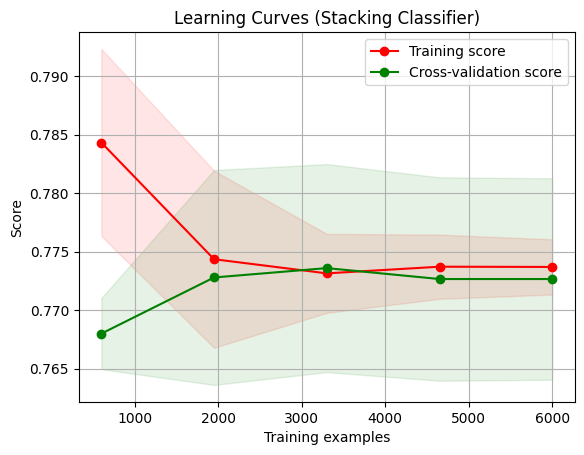

In [119]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy', n_jobs=-1
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )

    plt.legend(loc="best")
    return plt


# Plot learning curve for the stacking model
title = "Learning Curves (Stacking Classifier)"
plot_learning_curve(meta_model, title, X_train, y_train, cv=5)
plt.show()

## Clustering

      Gender  Age  EstimatedSalary  Occupation  Education Level  \
0          0   25           113734           7                0   
1          0   29            71724           4                0   
2          1   35            52958           0                0   
3          1   27            60738           0                3   
4          0   46            17501           2                0   
...      ...  ...              ...         ...              ...   
9995       1   37            65589           8                3   
9996       0   23            87154           1                3   
9997       1   26            91918           4                3   
9998       1   27            75823           1                1   
9999       1   34            90144           4                3   

      Marital Status  Age_Salary_Ratio  Cluster  
0                  1          0.000220        0  
1                  2          0.000404        0  
2                  3          0.000661       

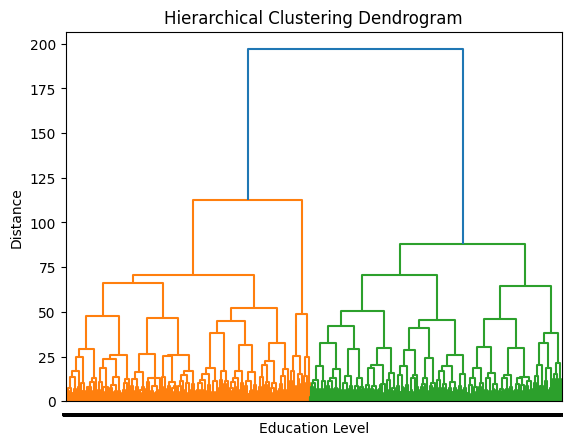

      Education Level  Cluster
0                   0        0
1                   0        0
2                   0        1
3                   3        1
4                   0        0
...               ...      ...
9995                3        1
9996                3        0
9997                3        1
9998                1        1
9999                3        1

[10000 rows x 2 columns]


In [120]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the dataset
#dataset = pd.read_csv('Downloads/Social_Network_Ads.csv')

# Encode the 'Gender' column
#label_encoder = LabelEncoder()
#dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

# Select features for clustering
X = dataset.drop(['Purchased','Age_Group'], axis=1)
print(X)

# Standardize the data
standard_scaler = StandardScaler()
X_scaled = standard_scaler.fit_transform(X)

# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')


# Plot the dendrogram
dendrogram(linkage_matrix, orientation='top', labels=dataset['Education Level'].tolist(), distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Education Level')
plt.ylabel('Distance')
plt.show()

# Use Agglomerative Clustering for a specific number of clusters (you can adjust n_clusters)
#n_clusters = 3
model = AgglomerativeClustering(n_clusters=best_params_ac['n_clusters'], metric=best_params_ac['metric'], linkage=best_params_ac['linkage'])
dataset['Cluster'] = model.fit_predict(X_scaled)

# Display the resulting clusters
print(dataset[['Education Level', 'Cluster']])


## ROC

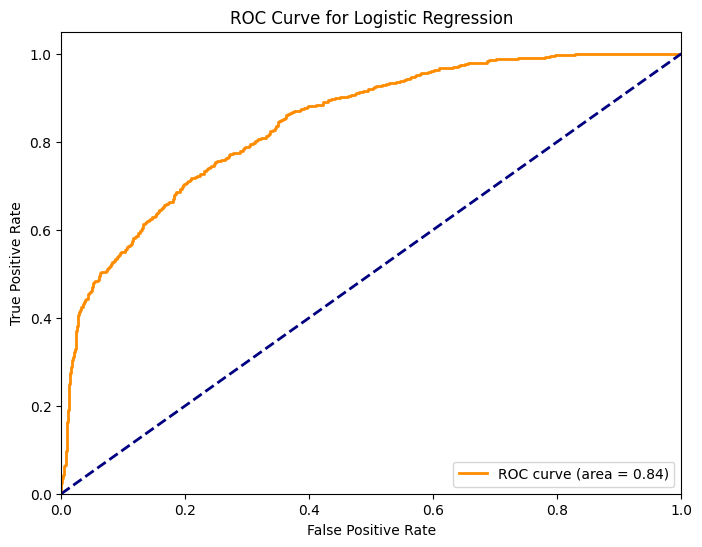

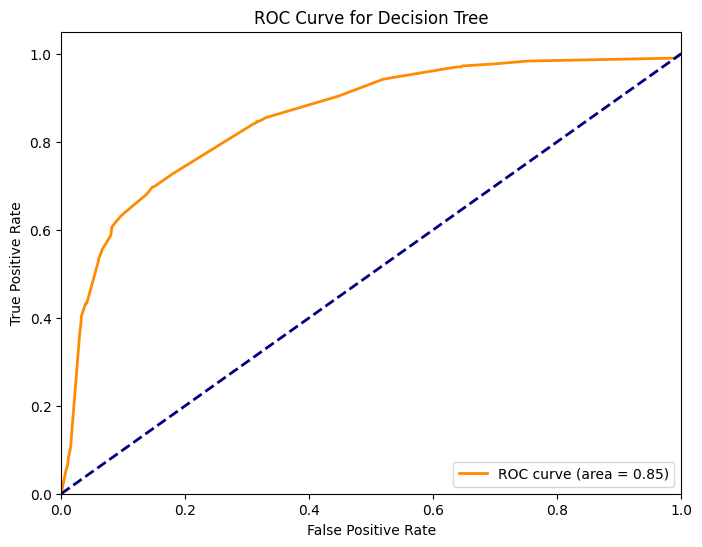

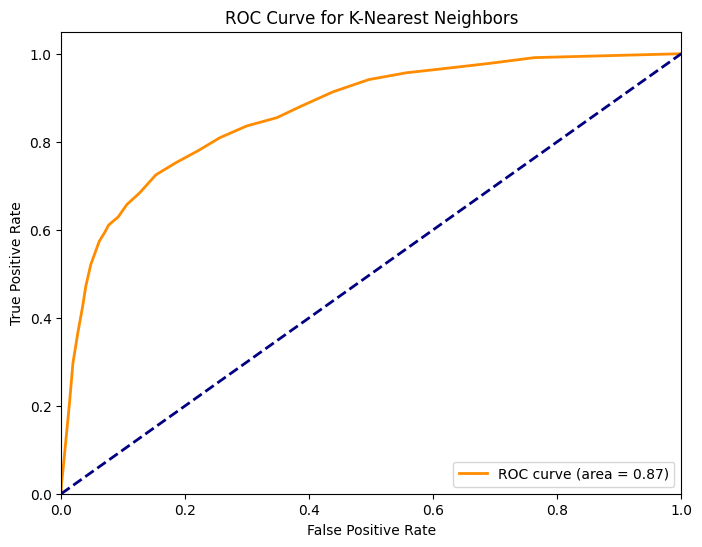

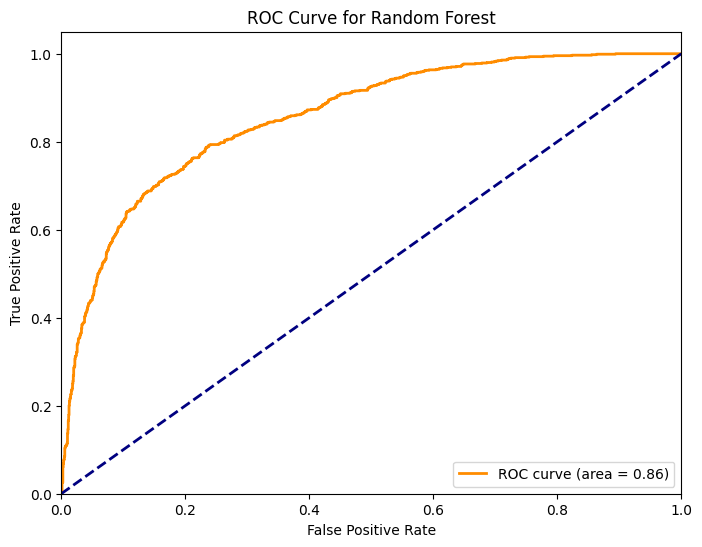

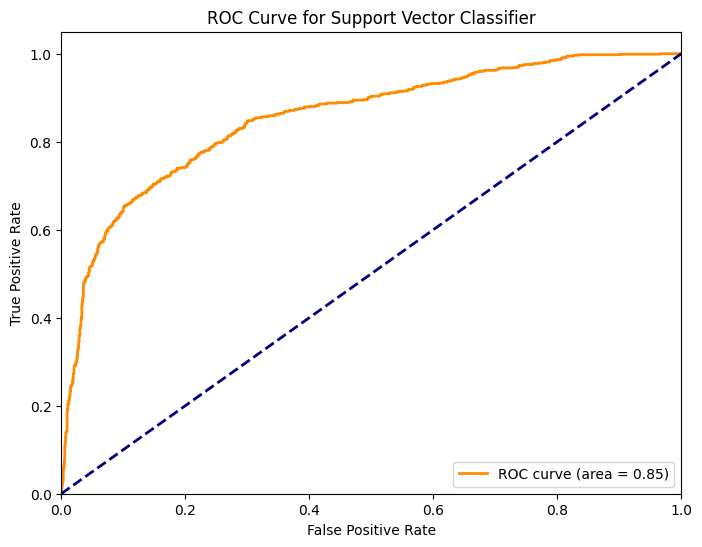

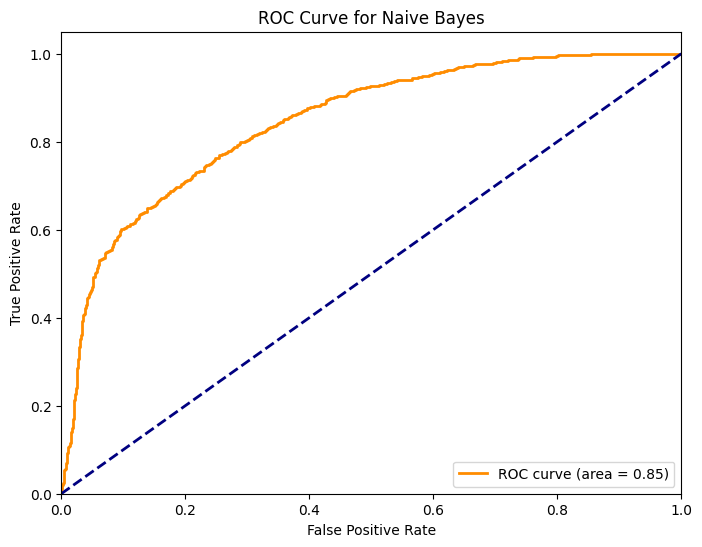

In [121]:

from sklearn.metrics import roc_curve, auc

def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()


fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
roc_auc_log = auc(fpr_log, tpr_log)
plot_roc_curve(fpr_log, tpr_log, roc_auc_log, 'Logistic Regression')

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, roc_auc_dt, 'Decision Tree')

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
plot_roc_curve(fpr_knn, tpr_knn, roc_auc_knn, 'K-Nearest Neighbors')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plot_roc_curve(fpr_rf, tpr_rf, roc_auc_rf, 'Random Forest')

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
roc_auc_svc = auc(fpr_svc, tpr_svc)
plot_roc_curve(fpr_svc, tpr_svc, roc_auc_svc, 'Support Vector Classifier')

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
plot_roc_curve(fpr_nb, tpr_nb, roc_auc_nb, 'Naive Bayes')


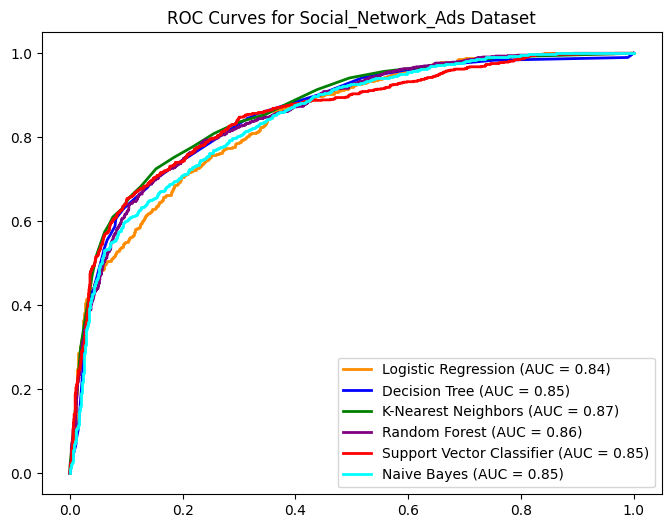

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))

fpr_log, tpr_log, thresholds_log = roc_curve(y_test, logreg_model.predict_proba(X_test)[:,1])
roc_auc_log = auc(fpr_log, tpr_log)
ax.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
ax.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
roc_auc_knn = auc(fpr_knn, tpr_knn)
ax.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
ax.plot(fpr_rf, tpr_rf, color='purple', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc_model.predict_proba(X_test)[:,1])
roc_auc_svc = auc(fpr_svc, tpr_svc)
ax.plot(fpr_svc, tpr_svc, color='red', lw=2, label=f'Support Vector Classifier (AUC = {roc_auc_svc:.2f})')

fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1])
roc_auc_nb = auc(fpr_nb, tpr_nb)
ax.plot(fpr_nb, tpr_nb, color='cyan', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

plt.legend(loc='lower right')
plt.title('ROC Curves for Social_Network_Ads Dataset')
plt.show()


## Error Rador Chart

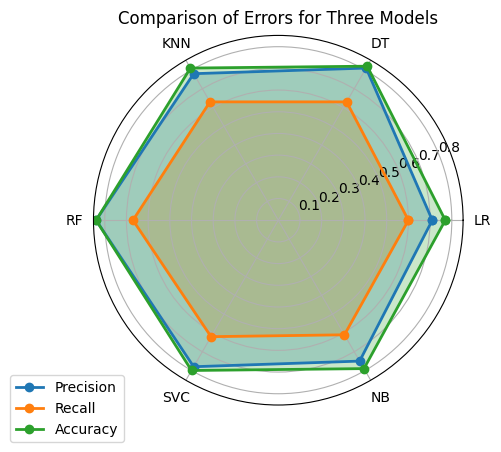

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of categories and the angles at which they are placed on the radar chart
categories = ['LR', 'DT', 'KNN', 'RF', 'SVC','NB']
N = len(categories)

# Define the data for the three machine learning models

model1_errors = [0.71,0.81,0.78,0.84,0.78,0.75]
model2_errors = [0.60,0.63,0.63,0.67,0.62,0.61]
model3_errors = [0.77,0.82,0.81,0.84,0.80,0.79]

# Create an array with the angles for each category
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]  # repeat the first angle to close the circular graph

# Plot the radar chart
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, model1_errors + model1_errors[:1], 'o-', linewidth=2, label='Precision')
ax.fill(angles, model1_errors + model1_errors[:1], alpha=0.25)
ax.plot(angles, model2_errors + model2_errors[:1], 'o-', linewidth=2, label='Recall')
ax.fill(angles, model2_errors + model2_errors[:1], alpha=0.25)
ax.plot(angles, model3_errors + model3_errors[:1], 'o-', linewidth=2, label='Accuracy')
ax.fill(angles, model3_errors + model3_errors[:1], alpha=0.25)

# Add labels, title, and legend
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_title('Comparison of Errors for Three Models', va='bottom')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()
